## retriever 만들기

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_chroma import Chroma
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='../.env', override=True)

apikey = os.getenv("OPENAI_API_KEY")


#### 문서 로더

파일
* TextLoader
| 일반 텍스트 파일(.txt) 읽기
* PDFPlumberLoader / PyPDFLoader
| PDF 문서 불러오기
* UnstructuredFileLoader
| 다양한 파일 포맷 (Word, PPT, PDF 등)을 구조 없이 불러오기
* CSVLoader
| CSV 파일의 각 행을 문서로 변환
* JSONLoader
| JSON 파일을 읽고 문서로 구성


웹/URL
* WebBaseLoader
| 일반 웹 페이지 크롤링
* SitemapLoader
| 사이트맵 기반으로 다수의 웹 페이지 로딩


문서 플랫폼
* NotionDBLoader
| Notion의 DB에서 문서 불러오기 (API 필요)
* ConfluenceLoader
| Atlassian Confluence 문서 불러오기


클라우드 문서
* GoogleDriveLoader
| 구글 드라이브에서 문서 불러오기
* OneDriveLoader
| 마이크로소프트 OneDrive에서 불러오기


코드/로컬
* GitLoader
| Git 저장소 내 파일 불러오기
* DirectoryLoader
| 특정 폴더 내 모든 문서 일괄 불러오기


메일
* OutlookMessageLoader
| Outlook .msg 파일 불러오기
* EmailLoader
| EML 또는 MIME 형식 이메일 로드


이미지/스캔
* UnstructuredImageLoader
| 이미지에서 텍스트 추출 (OCR 기반)
* UnstructuredPDFLoader
| PDF 전처리 고급

#### 새로나온 텍스트 스플릿 기능 (추후 적용 해보기)

* 유사도 기반 스플릿
* https://python.langchain.com/api_reference/experimental/text_splitter.html



In [53]:
# 문서 스플릿

from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, 
                                            chunk_overlap=100)

# 텍스트 파일을 load -> List[Document] 형태로 변환
loader1 = TextLoader("..\\ref\\docs\\law_test.txt")
# 문서 분할
split_doc1 = loader1.load_and_split(text_splitter)

# 문서 개수 확인
len(split_doc1)

10

In [71]:
# 임베딩

import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# 임시 DB 생성
# db = Chroma.from_documents(
#     documents=split_doc1, embedding=OpenAIEmbeddings(), 
#     collection_name="my_db"
# )

# 저장할 경로 지정
DB_PATH = ".\\chroma_db"

# # 문서를 디스크에 저장. 저장시 persist_directory에 저장할 경로를 지정.
# persist_db = Chroma.from_documents(
#     documents=split_doc1,
#     embedding=embeddings, 
#     persist_directory=DB_PATH, 
#     collection_name="my_db2"
# )

#디스크에서 문서를 로드.
db = Chroma(
    persist_directory=DB_PATH,
    embedding_function=embeddings,
    collection_name="my_db2",
)

In [10]:
# 저장된 데이터 확인
persist_db.get()

{'ids': ['2bf19298-80a4-4289-a4f1-44bfa430cd8e',
  'da9243fb-957f-46aa-8e4d-8267c4bec91a',
  '179a459d-6ba6-47d4-a1c4-40b7c05a85fa',
  '1202f34f-2c31-40ee-bd50-f5e009da3126',
  '0f0cb2d1-fa41-47f0-8754-f94043847d55',
  'f749d566-25d4-4561-8100-102c74225744',
  '9ca95306-8b48-4005-a07f-497a8e6b80bb',
  '48337bd7-8b37-4b5e-9fb0-280f4006835b',
  '1ae6bf9a-8d5a-4f02-b242-c623c49ddd1b',
  '1207b315-42d1-4d5b-8c92-07b894ff00ac'],
 'embeddings': None,
 'documents': ['소득세법\n[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n\n기획재정부(재산세제과(양도소득세)), 044-215-4312\n기획재정부(소득세제과(근로소득)), 044-215-4216\n기획재정부(금융세제과(이자소득, 배당소득)), 044-215-4233\n기획재정부(소득세제과(사업소득, 기타소득)), 044-215-4217\n\n제1장 총칙 <개정 2009. 12. 31.>\n\n1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]',
  '1조의2(정의)\n1항 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27., 2014. 12. 23., 2018. 12. 31.>\n1호 “거주자”란 국내에 주소를 두거나 183일 이상의 거소(居所)를 

#### 벡터 DB 수정하기

In [ ]:
# 문서 추가하기
from langchain_core.documents import Document

# page_content, metadata, id 지정
db.add_documents(
    [
        Document(
            page_content="안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요",
            metadata={"source": "mydata.txt"},
            id="1",
        )
    ]
)

In [ ]:
# 문서 삭제하기
# id 1 삭제
db.delete(ids=["1"])

#### 검색기 / Retrival 구현

* 관련 문서는 다음을 참조
  * https://python.langchain.com/docs/integrations/vectorstores/chroma/#initialization  

In [75]:
# mmr 알고리즘 기반 retriever 만들기
mmr_rt = db.as_retriever(
  search_type="mmr",
  search_kwargs={"k": 5, "lambda_mult": 0.25, "fetch_k": 10}
)

In [45]:
for i in mmr_rt.invoke("주식 투자 세금에 대해 알려줘"):
    print(i.page_content)
    print('-------------------------------')

2조의3(신탁재산 귀속소득에 대한 납세의무의 범위)
1항 신탁재산에 귀속되는 소득은 수익자(수익자 사망 시 상속인)에게 귀속되는 것으로 본다.
2항 위탁자가 신탁재산을 실질적으로 통제하는 신탁의 경우 그 소득은 위탁자에게 귀속된다.
[본조신설 2020. 12. 29.]

3조(과세소득의 범위)
1항 거주자에게는 이 법에서 규정하는 모든 소득에 대해 과세한다. 단, 일정한 외국인 거주자는 국외소득 중 국내에서 지급되거나 송금된 소득에만 과세한다.
2항 비거주자에게는 국내원천소득만 과세한다.
3항 일정한 동업자에게는 배분·분배된 초과 소득에 대해 과세한다.
[전문개정 2009. 12. 31.]
-------------------------------


In [51]:
# 유사도 기반 retriever 만들기
sim_rt = db.as_retriever(
  search_type="similarity_score_threshold",
  search_kwargs={"k": 3, "score_threshold": -0.5}
)

for i in sim_rt.invoke("세율 들에 대해 알려줘"):
    print(i.page_content)
    print('-------------------------------')

소득세법
[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]

기획재정부(재산세제과(양도소득세)), 044-215-4312
기획재정부(소득세제과(근로소득)), 044-215-4216
기획재정부(금융세제과(이자소득, 배당소득)), 044-215-4233
기획재정부(소득세제과(사업소득, 기타소득)), 044-215-4217

제1장 총칙 <개정 2009. 12. 31.>

1조(목적)
이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.
[본조신설 2009. 12. 31.]
[종전 제1조는 제2조로 이동 <2009. 12. 31.>]
-------------------------------
2조(납세의무)
1항 다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.
1호 거주자
2호 비거주자로서 국내원천소득(국내에서 발생한 소득)이 있는 개인
2항 다음 각 호의 어느 하나에 해당하는 자는 이 법에 따라 원천징수한 소득세를 납부할 의무를 진다.
1호 거주자
2호 비거주자
3호 내국법인
4호 외국법인의 국내지점 또는 국내영업소
5호 그 밖에 이 법에서 정하는 원천징수의무자
3항 「국세기본법」 제13조제1항에 따른 법인 아닌 단체 중 같은 조 제4항에 따른 법인으로 보는 단체 외의 법인 아닌 단체는 국내에 주사무소 또는 사업의 실질적 관리장소를 둔 경우에는 1거주자로, 그 밖의 경우에는 1비거주자로 본다.
단, 다음 각 호에 해당하는 경우에는 소득구분에 따라 해당 단체의 각 구성원별로 이 법 또는 「법인세법」에 따라 소득세 또는 법인세를 납부할 의무를 진다.
-------------------------------
8조(상속 등의 경우의 납세지)
1항 상속인 등이 신고한 장소
2항 비거주자가 납세관리인 두면 신고장소
3항 신고 있으면 신고한 장소
4항 신고 없으

c:\Users\JS\.conda\envs\ai\lib\site-packages\langchain_core\vectorstores\base.py:1082: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='dc74cc90-830e-49a8-99e2-db5061ce4e3b', metadata={'source': '..\\ref\\docs\\law_test.txt'}, page_content='소득세법\n[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n\n기획재정부(재산세제과(양도소득세)), 044-215-4312\n기획재정부(소득세제과(근로소득)), 044-215-4216\n기획재정부(금융세제과(이자소득, 배당소득)), 044-215-4233\n기획재정부(소득세제과(사업소득, 기타소득)), 044-215-4217\n\n제1장 총칙 <개정 2009. 12. 31.>\n\n1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]'), -0.2030448701041745), (Document(id='64588749-8408-411e-9460-20b451016385', metadata={'source': '..\\ref\\docs\\law_test.txt'}, page_content='2조(납세의무)\n1항 다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.\n1호 거주자\n2호 비거주자로서 국내원천소득(국내에서 발생한 소득)이 있는 개인\n2항 다음 각 호의 어느 하나에 해당하는 자는 이 법에 따라 원천징수한 소득세를 납부할 의무를 진다.\n1호 거주자\n2호

#### 멀티 모달 검색(추후 구현)

* 여러 양식의 데이터를 포함하고 쿼리할 수 있는 컬렉션을 지원

#### 이미지를 컬렉션에 포함하기 (이게 필요할까?)

## LLM 체인 연결

In [72]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo",
                 temperature=0)

스트림 출력

In [81]:
from langchain.chains import create_retrieval_chain
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
    "Answer the following question based on the context: {context}\nQuestion: {input}"
)

chain = create_retrieval_chain(
    retriever=mmr_rt,
    combine_docs_chain=prompt | llm
)

# for chunk in chain.stream({"input": "소득세법 적용 대상에 대해 알려줘"}):
#     print(chunk)

for chunk in chain.stream({"input": "소득세법 적용 대상에 대해 알려줘"}):
    # answer 키가 있을 때만 출력 (context 등은 무시)
    if "answer" in chunk:
        print(chunk["answer"].content, end="", flush=True)

소득세법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 합니다. 이 법은 국내에 주소를 두거나 183일 이상의 거소를 둔 개인인 "거주자"와 거주자가 아닌 개인인 "비거주자"를 대상으로 적용됩니다. 또한, 사업소득이 있는 거주자인 "사업자"도 소득세법의 적용 대상입니다.

In [116]:
response = chain.invoke({"input": "소득세법 적용 대상에 대해 알려줘"})
# print(response["answer"].content)
print(response)

{'input': '소득세법 적용 대상에 대해 알려줘', 'context': [Document(id='dc74cc90-830e-49a8-99e2-db5061ce4e3b', metadata={'source': '..\\ref\\docs\\law_test.txt'}, page_content='소득세법\n[시행 2025. 7. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n\n기획재정부(재산세제과(양도소득세)), 044-215-4312\n기획재정부(소득세제과(근로소득)), 044-215-4216\n기획재정부(금융세제과(이자소득, 배당소득)), 044-215-4233\n기획재정부(소득세제과(사업소득, 기타소득)), 044-215-4217\n\n제1장 총칙 <개정 2009. 12. 31.>\n\n1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.\n[본조신설 2009. 12. 31.]\n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]'), Document(id='a0dd12c9-413a-4031-9f31-454578d886a1', metadata={'source': '..\\ref\\docs\\law_test.txt'}, page_content='8조(상속 등의 경우의 납세지)\n1항 상속인 등이 신고한 장소\n2항 비거주자가 납세관리인 두면 신고장소\n3항 신고 있으면 신고한 장소\n4항 신고 없으면 주소·소재지 등\n5항 국내 주소 없는 공무원 등은 대통령령으로 정하는 장소\n[전문개정 2009. 12. 31.]\n\n9조(납세지의 지정)\n1항 다음 각 호에 해당하면 국세청장이 별도 지정 가능\n1호 사업소득자 신청\n2호 소득 상황상 부적합 또는 불편 인정 시\n2항 부적합하다고 판단되면 통지\n3항 지정 사유 소멸 시 취소\n4항 취소 전 신고, 납부 등 효력 유지\n[전문개정 2009. 1

## RAG 평가 파이프라인

In [87]:
num_questions = 5
documents = split_doc1  # 또는 loader1.load_and_split(text_splitter)
llm_for_question = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.9)
questions = []

for i in range(num_questions):
    prompt = f"""
다음 문서를 바탕으로 질문을 1개 생성해 주세요.
반드시 질문문장만 출력해 주세요. '질문:'이라는 표현 없이 완전한 한국어 질문 형태로만 작성해 주세요.

문서 내용:
{documents[i % len(documents)].page_content}
"""
    question = llm_for_question.invoke(prompt).content
    questions.append(question)

print(questions)

['소득세법의 목적은 무엇인가요?', '거주자와 비거주자는 어떻게 구분되나요?', '개인이 소득세를 납부할 의무가 있는 경우는 어떤 상황인가요?', '해당 단체의 구성원 간 이익의 분배비율이 확인될 경우 소득세 또는 법인세 납부 의무는 어떻게 결정되나요?', '문서의 전문개정 날짜는 언제인가요?']


#### 평가

In [99]:
from datasets import Dataset
from ragas.metrics import (
    faithfulness,
    answer_relevancy,   # 생성된 답변이 원래 질문에 얼마나 적절한지 측정. 질문에 직접적으로 응답하는 답변은 높은 점수
    context_precision,  # 생성된 답변에 사용된 컨텍스트 정보가 얼마나 관련성이 있는지 측정. 불필요한 정보 없이 질문과 관련된 컨텍스트만 포함되어 있으면 높은 점수
    context_recall,     # 답변 생성에 필요한 모든 정보가 검색된 컨텍스트에 포함되어 있는지 측정. 질문에 답하는 데 필요한 정보가 모두 검색되면 높은 점수
    answer_correctness  # 생성된 답변이 참조 답변과 비교하여 얼마나 정확한지 평가, 참조 답변이 필요
)
from ragas.evaluation import evaluate
import pandas as pd

def evaluate_with_ragas(qa_chain, questions):
    use_faithfulness = True
    use_answer_relevancy = True
    use_context_precision = True
    use_context_recall = True    
    use_answer_correctness = False
        
    evaluation_data = {
        "question": [],
        "answer": [],
        "contexts": []
    }
    
    if use_context_precision or use_context_recall:
        evaluation_data["reference"] = []
    
    for question in questions:
        result = qa_chain.invoke({"input": question})
        # 답변 추출 (AIMessage 객체의 content)
        answer = result["answer"].content if hasattr(result["answer"], "content") else str(result["answer"])
        # context 추출 (Document 객체 리스트)
        contexts = [doc.page_content for doc in result["context"]]
        
        evaluation_data["question"].append(question)
        evaluation_data["answer"].append(answer)
        evaluation_data["contexts"].append(contexts)
        
        if use_context_precision or use_context_recall:
            evaluation_data["reference"].append(contexts[0] if contexts else "")
    
    eval_dataset = Dataset.from_dict(evaluation_data)
    
    metrics = []
    if use_faithfulness:
        metrics.append(faithfulness)
    if use_answer_relevancy:
        metrics.append(answer_relevancy)
    if use_context_precision:
        metrics.append(context_precision)
    if use_context_recall:
        metrics.append(context_recall)
    if use_answer_correctness:
        metrics.append(answer_correctness)
    
    results = evaluate(
        eval_dataset,
        metrics=metrics
    )
    
    results_df = pd.DataFrame({
        "question": evaluation_data["question"],
        "answer": evaluation_data["answer"]
    })
    
    for metric in metrics:
        results_df[metric.name] = results[metric.name]
    
    return results_df

In [96]:
%pip install ragas


  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)

   ------------- -------------------------- 1/3 [diskcache]
   ------------- -------------------------- 1/3 [diskcache]
   ------------- -------------------------- 1/3 [diskcache]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   -------------------------- ------------- 2/3 [ragas]
   ------------------

In [100]:
results = evaluate_with_ragas(chain, questions)

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

#### 평가결과

In [101]:
print("평가 결과:")
print(results)

metric_columns = [col for col in results.columns if col not in ["question", "answer"]]
if metric_columns:
    avg_scores = results[metric_columns].mean()
    print("\n평균 점수:")
    print(avg_scores)

평가 결과:
                                            question  \
0                                   소득세법의 목적은 무엇인가요?   
1                              거주자와 비거주자는 어떻게 구분되나요?   
2                  개인이 소득세를 납부할 의무가 있는 경우는 어떤 상황인가요?   
3  해당 단체의 구성원 간 이익의 분배비율이 확인될 경우 소득세 또는 법인세 납부 의무...   
4                                문서의 전문개정 날짜는 언제인가요?   

                                              answer  faithfulness  \
0  소득세법의 목적은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 ...      1.000000   
1  거주자는 국내에 주소를 두거나 183일 이상의 거소를 둔 개인을 말하고, 비거주자는...      1.000000   
2  개인이 소득세를 납부할 의무가 있는 경우는 다음과 같습니다:\n1. 거주자\n2. ...      0.666667   
3  해당 단체의 구성원 간 이익의 분배비율이 확인될 경우, 소득세 또는 법인세 납부 의...      1.000000   
4                     문서의 전문개정 날짜는 2009년 12월 31일입니다.      1.000000   

   answer_relevancy  context_precision  context_recall  
0          0.849756                1.0           1.000  
1          0.891247                1.0           1.000  
2          0.839512                1.0           1.000  
3      

In [102]:
%pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.9 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.9 MB 3.3 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.9 MB 3.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.9 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.9 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.9 MB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/7.9 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/7.9 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


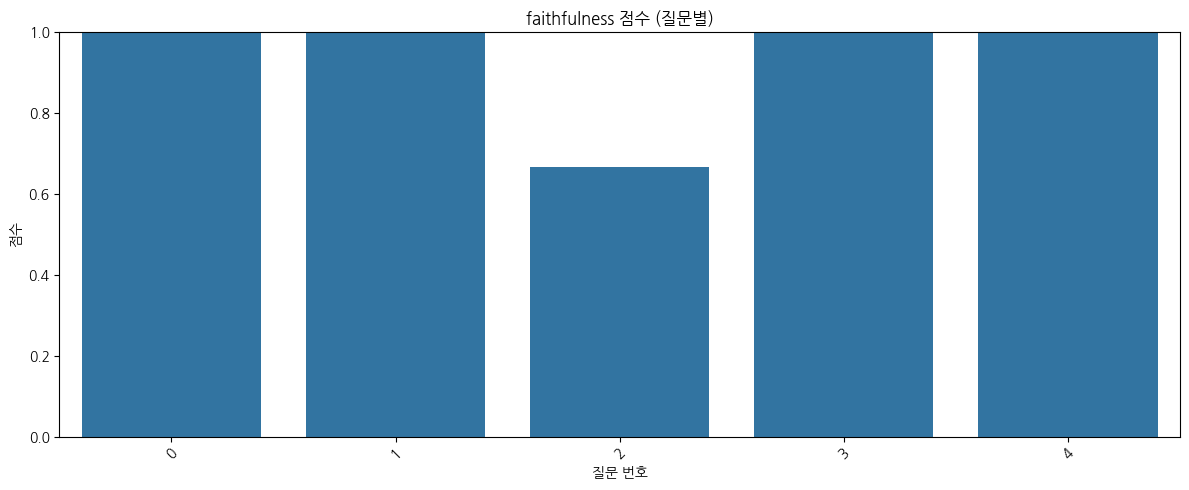

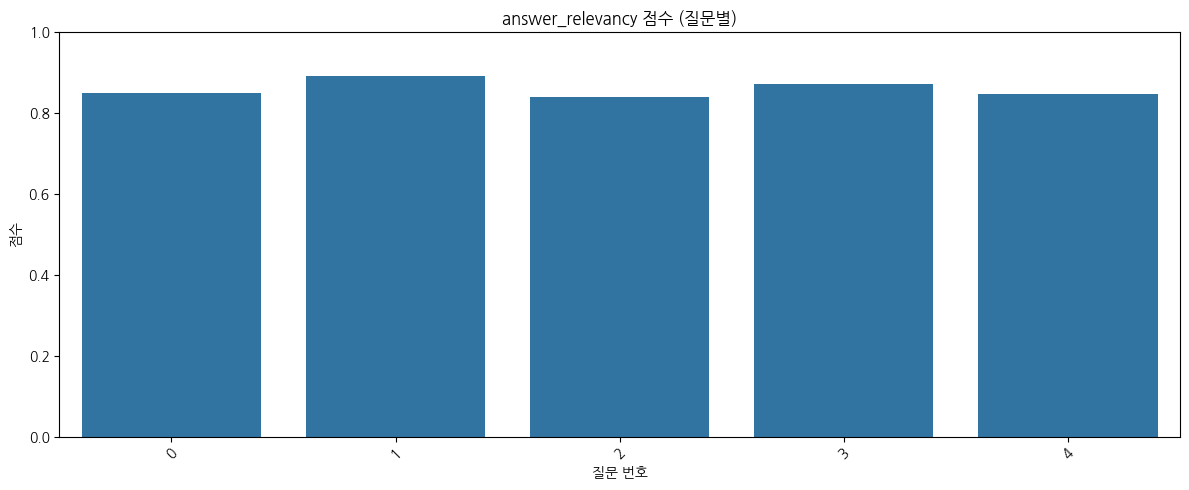

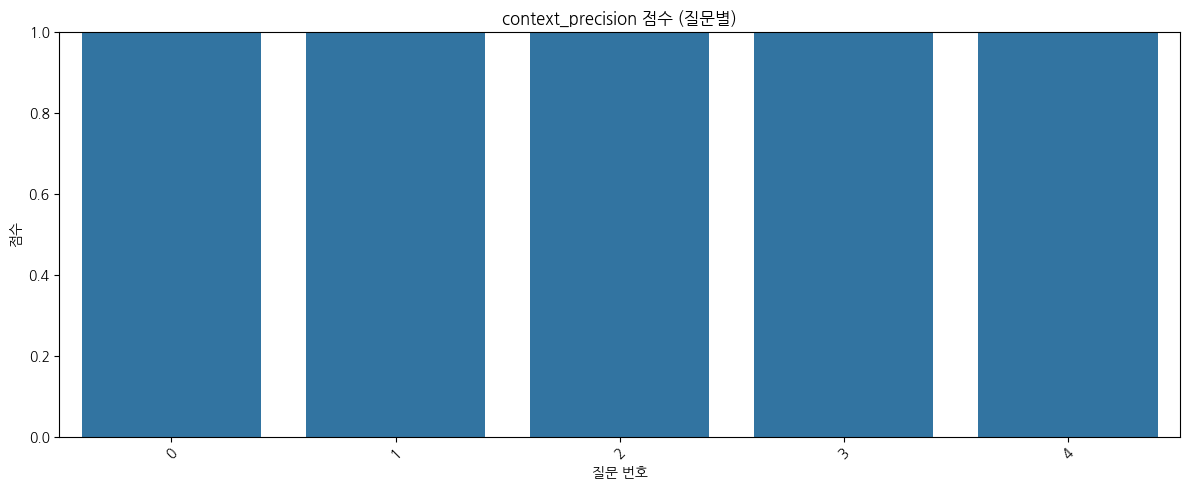

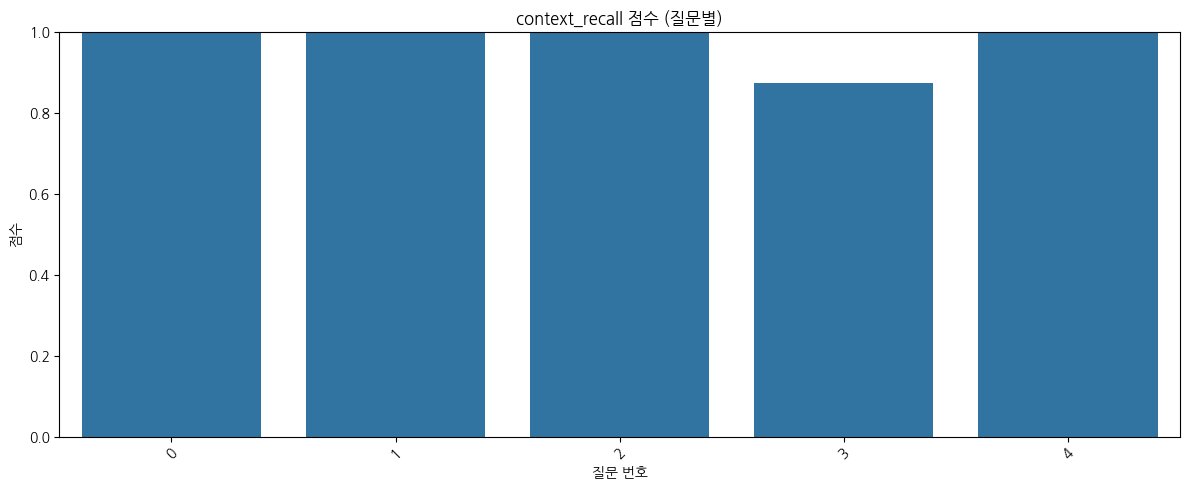

In [103]:
# 질문별 지표 점수 막대그래프
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

def visualize_ragas_results(results_df):
    metric_columns = [col for col in results_df.columns if col not in ["question", "answer"]]
    
    for metric in metric_columns:
        plt.figure(figsize=(12, 5))
        sns.barplot(x=results_df.index, y=results_df[metric])
        plt.title(f"{metric} 점수 (질문별)")
        plt.xlabel("질문 번호")
        plt.ylabel("점수")
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

visualize_ragas_results(results)

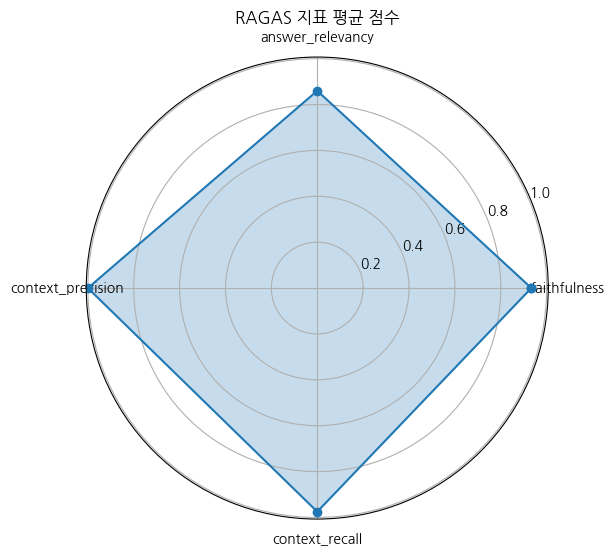

In [104]:
# 전체 평균값 레이다 차트
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_chart(avg_scores):
    metrics = avg_scores.index.tolist()
    scores = avg_scores.values.tolist()
    
    # 각 축의 각도 설정 (점수를 먼저 안 늘림)
    num_metrics = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    
    # 시작점으로 되돌아오기 위해 첫 점 추가 (마지막 값 = 첫 값)
    scores += scores[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, scores, marker='o')
    ax.fill(angles, scores, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title("RAGAS 지표 평균 점수")
    plt.show()

    
plot_radar_chart(avg_scores)


## 커스텀 평가지표 만드는 법

In [105]:
# 사용자 정의 평가 지표로 'hallucinations_metric'을 생성함
# Faithfulness 점수를 기반으로 환각 정도를 계산 (1 - faithfulness)

from dataclasses import dataclass, field  # 데이터 클래스 사용을 위한 모듈
from ragas.metrics.base import MetricWithLLM, SingleTurnMetric, MetricType  # 평가 지표의 기본 클래스들
from ragas.metrics import Faithfulness  # 기존의 Faithfulness 메트릭 사용
import typing as t  # 타입 힌트를 위한 모듈
from ragas.callbacks import Callbacks  # 평가 진행 중 이벤트 콜백
from ragas.dataset_schema import SingleTurnSample  # 단일 질문-응답 샘플 형식 정의

# 데이터 클래스 선언: 사용자 정의 평가 지표 HallucinationsMetric 정의
@dataclass
class HallucinationsMetric(MetricWithLLM, SingleTurnMetric):
    # 지표 이름 설정
    name: str = "hallucinations_metric"

    # 이 지표를 계산하기 위해 필요한 데이터 열 정의 (사용자 질문, 응답, 검색된 문맥)
    _required_columns: t.Dict[MetricType, t.Set[str]] = field(
        default_factory=lambda: {
            MetricType.SINGLE_TURN: {"user_input", "response", "retrieved_contexts"}
        }
    )

    # 클래스 초기화 이후 실행되는 후처리 함수
    def __post_init__(self):
        # 내부적으로 Faithfulness 메트릭을 초기화하여 활용함
        self.faithfulness_metric = Faithfulness(llm=self.llm)

    # 실제 점수를 계산하는 비동기 함수
    async def _single_turn_ascore(
        self, sample: SingleTurnSample, callbacks: Callbacks
    ) -> float:
        # Faithfulness 점수를 먼저 계산함
        faithfulness_score = await self.faithfulness_metric.single_turn_ascore(
            sample, callbacks
        )
        # 환각 점수 = 1 - faithfulness 점수
        return 1 - faithfulness_score


In [106]:
import os  # 환경변수에서 API 키나 모델명 등을 불러오기 위해 사용

from ragas.llms import LangchainLLMWrapper  # LangChain의 LLM을 RAGAS에서 사용 가능하도록 감싸주는 래퍼

# OpenAI의 챗 모델을 LangChain에서 불러오기
llm = ChatOpenAI(
    temperature=0,  # 일관된 결과를 위해 생성 다양성 최소화
    model_name="gpt-4o-mini"  # 환경변수에서 모델 이름 불러오기 (예: "gpt-4")
)

# RAGAS에서 사용할 수 있도록 LangChain LLM을 래핑
evaluator_llm = LangchainLLMWrapper(llm)

# 앞서 정의한 환각 평가 메트릭에 LLM을 연결하여 인스턴스 생성
hallucinations_metric = HallucinationsMetric(llm=evaluator_llm)

In [107]:
# 단일 질문-응답 샘플을 생성하여 환각 점수를 계산하는 예시
sample = SingleTurnSample(
    user_input="파리는 어느 나라의 수도인가요?",
    response="파리는 프랑스의 수도입니다.",
    retrieved_contexts=["파리는 프랑스의 수도입니다. 프랑스는 유럽에 위치한 국가로, 파리는 세계적인 문화, 예술, 패션의 중심지로 알려져 있습니다."]
)
# 비동기 함수 실행 및 결과 출력
score = await hallucinations_metric.single_turn_ascore(sample)
print("Hallucination 점수:", score)

Hallucination 점수: 0.0


#### custom metric 적용

In [117]:
from datasets import Dataset
import pandas as pd
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_precision,
    context_recall,
    answer_correctness
)

# RAG 시스템(qa_chain)으로 생성된 답변과 그에 대한 질문·문맥 정보를 기반으로 RAGAS 평가 지표들(기본 + 사용자 정의 hallucinations)을 적용해 질문별 평가 결과를 데이터프레임 형태로 반환합니다.
def evaluate_with_ragas_with_custom_metric(qa_chain, questions):
    # 사용할 평가 지표 선택 (True: 사용 / False: 미사용)
    use_faithfulness = True
    use_answer_relevancy = True
    use_context_precision = True
    use_context_recall = True    
    use_answer_correctness = False
    use_hallucinations = True  # 사용자 정의 환각 평가 추가 여부

    # 평가용 데이터 구조 초기화
    evaluation_data = {
        "question": [],   # 질문
        "answer": [],     # 생성된 답변
        "contexts": []    # 검색된 문서 조각 (복수)
    }

    # context_precision / recall을 위한 reference 컬럼 추가
    if use_context_precision or use_context_recall:
        evaluation_data["reference"] = []

    # 각 질문에 대해 RAG QA 체인 실행
    for question in questions:
        result = qa_chain.invoke({"input": question})  # RAG 시스템에서 답변 생성
        answer = result["answer"].content
        contexts = [doc.page_content for doc in result["context"]]

        # 평가용 데이터 누적
        evaluation_data["question"].append(question)
        evaluation_data["answer"].append(answer)
        evaluation_data["contexts"].append(contexts)

        # reference 문서 (보통 첫 번째 context) 추가
        if use_context_precision or use_context_recall:
            evaluation_data["reference"].append(contexts[0] if contexts else "")

    # 평가를 위한 huggingface Dataset 객체 생성
    eval_dataset = Dataset.from_dict(evaluation_data)

    # 사용할 메트릭 리스트 구성
    metrics = []
    if use_faithfulness:
        metrics.append(faithfulness)
    if use_answer_relevancy:
        metrics.append(answer_relevancy)
    if use_context_precision:
        metrics.append(context_precision)
    if use_context_recall:
        metrics.append(context_recall)
    if use_answer_correctness:
        metrics.append(answer_correctness)
    if use_hallucinations:
        # 사용자 정의 환각 평가 메트릭 추가
        hallucinations_metric = HallucinationsMetric(llm=evaluator_llm)
        metrics.append(hallucinations_metric)

    # RAGAS 평가 실행
    results = evaluate(
        eval_dataset,
        metrics=metrics
    )

    # 결과를 DataFrame 형태로 정리
    results_df = pd.DataFrame({
        "question": evaluation_data["question"],
        "answer": evaluation_data["answer"]
    })

    # 각 메트릭 결과 컬럼에 추가
    for metric in metrics:
        results_df[metric.name] = results[metric.name]

    return results_df  # 평가 결과 데이터프레임 반환


In [118]:
results = evaluate_with_ragas_with_custom_metric(chain, questions)

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

In [119]:
print("평가 결과:")
print(results)

metric_columns = [col for col in results.columns if col not in ["question", "answer"]]
if metric_columns:
    avg_scores = results[metric_columns].mean()
    print("\n평균 점수:")
    print(avg_scores)

평가 결과:
                                            question  \
0                                   소득세법의 목적은 무엇인가요?   
1                              거주자와 비거주자는 어떻게 구분되나요?   
2                  개인이 소득세를 납부할 의무가 있는 경우는 어떤 상황인가요?   
3  해당 단체의 구성원 간 이익의 분배비율이 확인될 경우 소득세 또는 법인세 납부 의무...   
4                                문서의 전문개정 날짜는 언제인가요?   

                                              answer  faithfulness  \
0  소득세법의 목적은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 ...      1.000000   
1  거주자는 국내에 주소를 두거나 183일 이상의 거소를 둔 개인을 말하고, 비거주자는...      1.000000   
2  개인이 소득세를 납부할 의무가 있는 경우는 다음과 같습니다:\n1. 거주자\n2. ...      0.666667   
3  해당 단체의 구성원 간 이익의 분배비율이 확인될 경우, 소득세 또는 법인세 납부 의...      1.000000   
4                     문서의 전문개정 날짜는 2009년 12월 31일입니다.      1.000000   

   answer_relevancy  context_precision  context_recall  hallucinations_metric  
0          0.849745                1.0           1.000               0.000000  
1          0.891278                1.0           0.875               0.0000

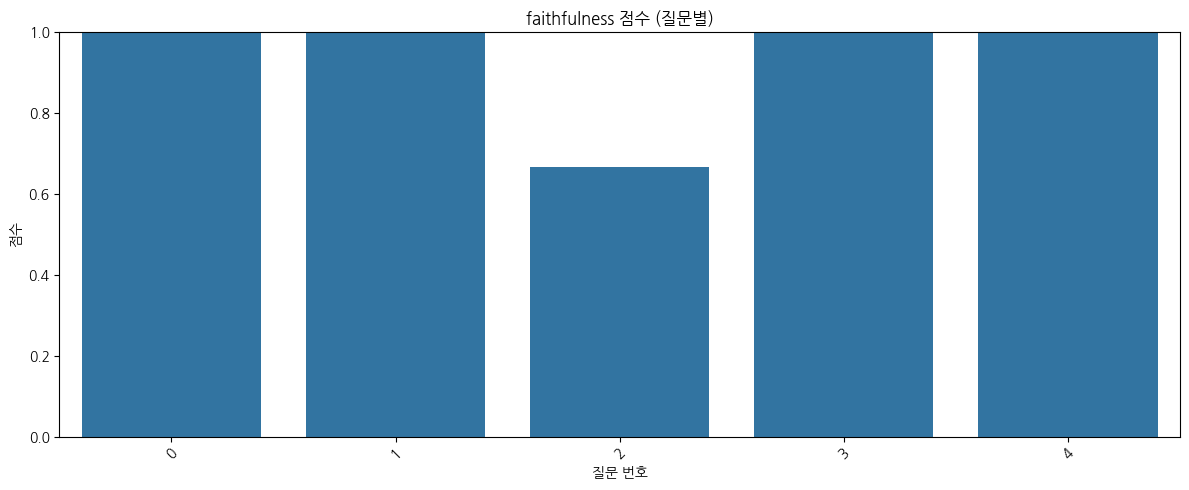

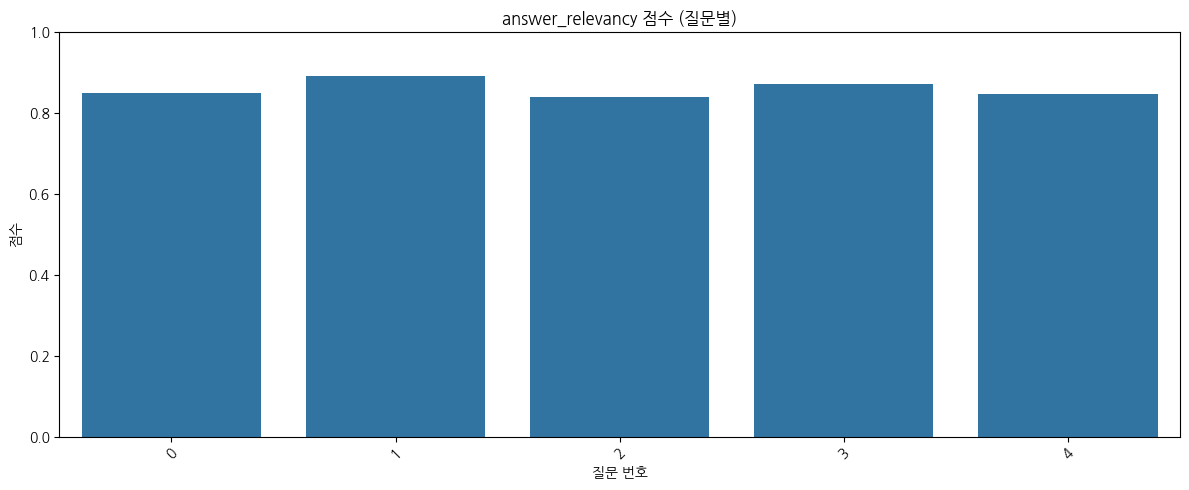

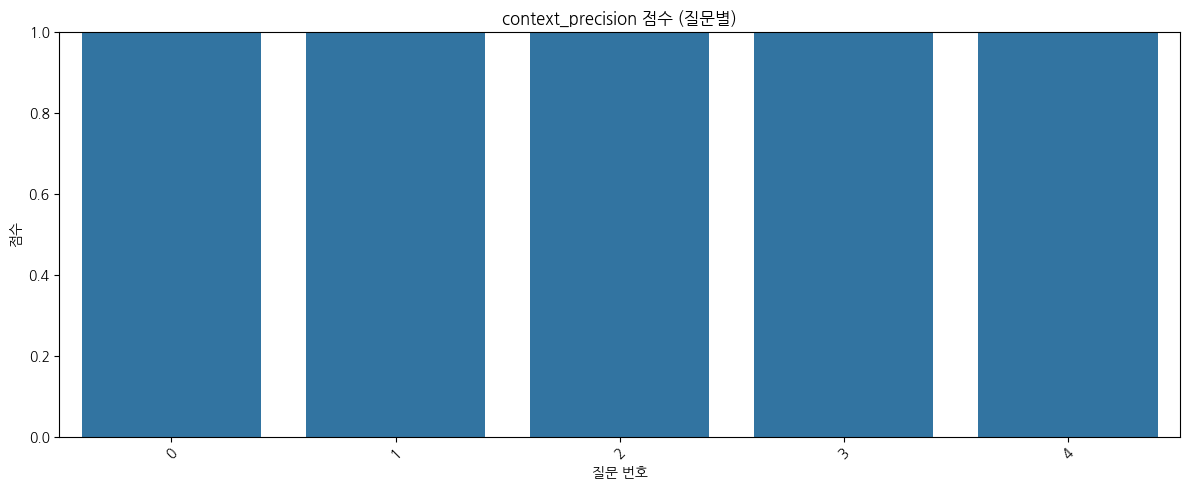

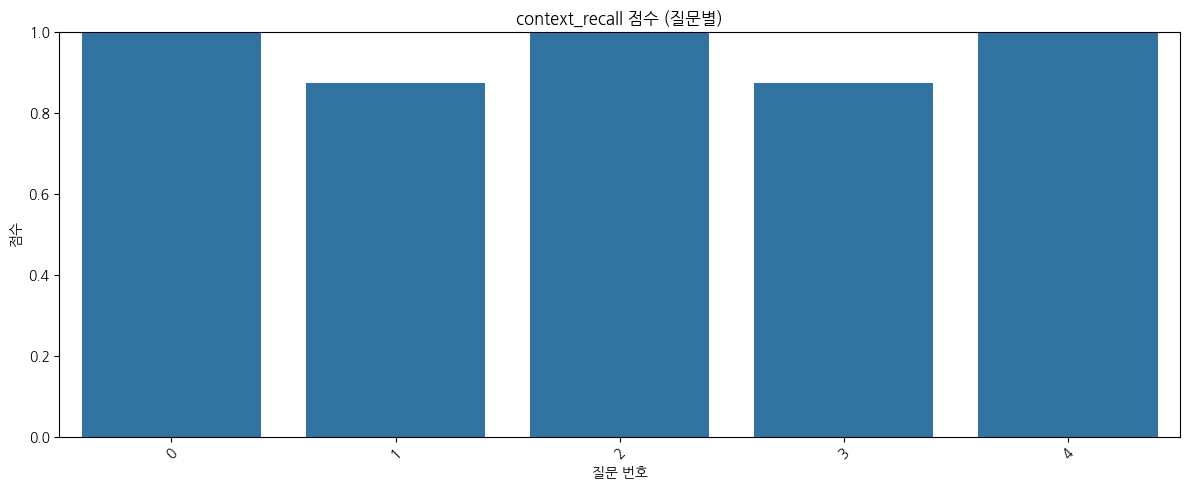

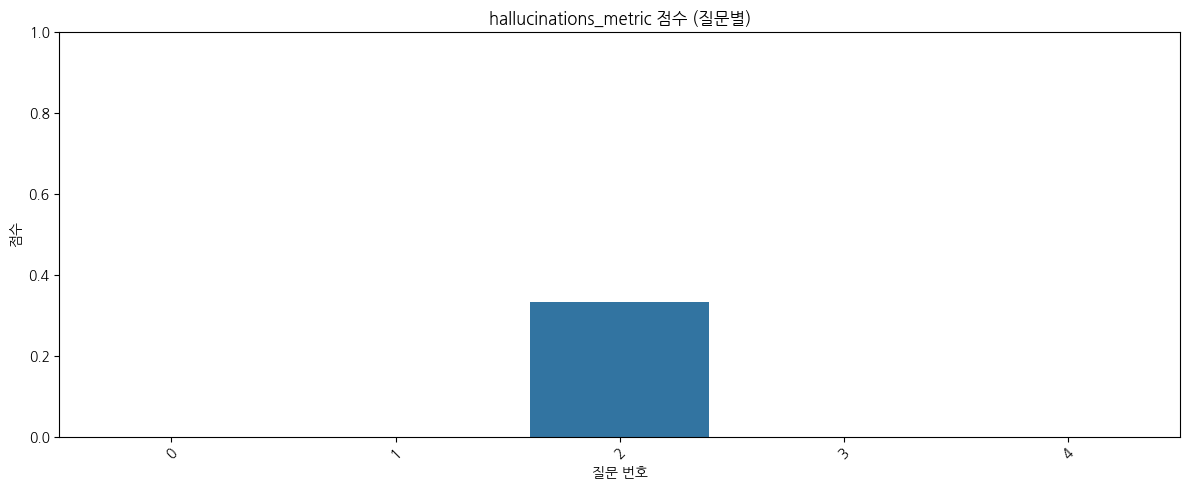

In [120]:
visualize_ragas_results(results)